In [1]:
import pandas as pd
import matplotlib. pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_excel('/Users/moulyanaveenachoday/Downloads/Recalls.xlsx')

In [3]:
df.shape

(78451, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78451 entries, 0 to 78450
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   FEI Number                  78451 non-null  object        
 1   Recalling Firm Name         78451 non-null  object        
 2   Product Type                78451 non-null  object        
 3   Product Classification      78451 non-null  object        
 4   Status                      78451 non-null  object        
 5   Distribution Pattern        78450 non-null  object        
 6   Recalling Firm City         78451 non-null  object        
 7   Recalling Firm State        78451 non-null  object        
 8   Recalling Firm Country      78451 non-null  object        
 9   Center Classification Date  78451 non-null  datetime64[ns]
 10  Reason for Recall           78451 non-null  object        
 11  Product Description         78451 non-null  object    

In [5]:
df.head()

,FEI Number,Recalling Firm Name,Product Type,Product Classification,Status,Distribution Pattern,Recalling Firm City,Recalling Firm State,Recalling Firm Country,Center Classification Date,Reason for Recall,Product Description,Event ID,Event Classification,Product ID,Center,Recall Details
0,1072425,"OneBlood, Inc.",Biologics,Class II,Completed,Florida,Orlando,Florida,United States,2022-06-12,"Apheresis Red Blood Cell product, for which qu...","Apheresis Red Blood Cells, Leukocytes Reduced",90354,Class II,194207,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...
1,1070196,"OneBlood, Inc.",Biologics,Class II,Terminated,Louisiana,St Petersburg,Florida,United States,2022-06-12,"Apheresis Red Blood Cell products, for which q...","Apheresis Red Blood Cells, Leukocytes Reduced",90329,Class II,194144,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...
2,1070196,"OneBlood, Inc.",Biologics,Class II,Terminated,North Carolina,St Petersburg,Florida,United States,2022-06-12,"Apheresis Red Blood Cell products, for which q...","Apheresis Red Blood Cells, Leukocytes Reduced",90357,Class II,194211,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...
3,1626009,Oklahoma Blood Institute,Biologics,Class II,Terminated,Ohio; Oklahoma,Oklahoma City,Oklahoma,United States,2022-06-12,"Blood products, for which donor eligibility wa...","Red Blood Cells, Leukocytes Reduced",90356,Class II,194209,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...
4,1626009,Oklahoma Blood Institute,Biologics,Class II,Terminated,Ohio; Oklahoma,Oklahoma City,Oklahoma,United States,2022-06-12,"Blood products, for which donor eligibility wa...",Cryoprecipitated AHF,90356,Class II,194210,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...


In [6]:
df['Product Type'].unique()

array(['Biologics', 'Devices', 'Food/Cosmetics', 'Drugs', 'Veterinary',
       'Tobacco'], dtype=object)

In [7]:
df.isnull().sum()

FEI Number                    0
Recalling Firm Name           0
Product Type                  0
Product Classification        0
Status                        0
Distribution Pattern          1
Recalling Firm City           0
Recalling Firm State          0
Recalling Firm Country        0
Center Classification Date    0
Reason for Recall             0
Product Description           0
Event ID                      0
Event Classification          0
Product ID                    0
Center                        0
Recall Details                0
dtype: int64

In [8]:
df[df['Distribution Pattern'].isna()]

,FEI Number,Recalling Firm Name,Product Type,Product Classification,Status,Distribution Pattern,Recalling Firm City,Recalling Firm State,Recalling Firm Country,Center Classification Date,Reason for Recall,Product Description,Event ID,Event Classification,Product ID,Center,Recall Details
2415,3012046682,FlexDex Inc.,Devices,Class II,Ongoing,NaN,Brighton,Michigan,United States,2022-01-27,The firm is reinforcing the IFU instructions: ...,"8mm FlexDex Needle Driver, Product Code FD-335 ND",89316,Class II,191253,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...


In [9]:
df.groupby('Recalling Firm Name')['Event ID'].count().sort_values(ascending=False)

Recalling Firm Name
Zimmer Biomet, Inc.                              875
Customed, Inc                                    682
OneBlood, Inc.                                   673
Garden-Fresh Foods, Inc.                         634
Aidapak Services, LLC                            538
                                                ... 
Jones Natural Chews, Co., Inc.                     1
Joliet Blood Plasma LLC dba Plasma Care, Inc.      1
Johnson, S C and Son, Inc                          1
Johnson Sea Products, Inc.                         1
yoders country market                              1
Name: Event ID, Length: 8419, dtype: int64

In [10]:
df['Event Classification'].unique()

array(['Class II', 'Class III', 'Class I'], dtype=object)

In [11]:
d = df.groupby(['Recalling Firm Name','Event Classification'])['Product Description'].count()
d

Recalling Firm Name       Event Classification
1 Epic, LLC               Class II                 4
1908 Brands               Class II                 6
2 Moms in the Raw, LLC    Class I                  1
21ST CENTURY SNACK FOODS  Class II                 1
21st Century Foods, Inc.  Class II                 1
                                                  ..
the Compounder            Class II                47
ulrich medical USA Inc    Class II                 3
weaver fundraising        Class II                 2
www.blankterrmall.com     Class I                  1
yoders country market     Class I                  1
Name: Product Description, Length: 10044, dtype: int64

In [12]:
class1 = df[df['Event Classification']=='Class I']
class2 = df[df['Event Classification']=='Class II']
class1.shape, class2.shape

((16280, 17), (55488, 17))

In [13]:
df.dtypes

FEI Number                            object
Recalling Firm Name                   object
Product Type                          object
Product Classification                object
Status                                object
Distribution Pattern                  object
Recalling Firm City                   object
Recalling Firm State                  object
Recalling Firm Country                object
Center Classification Date    datetime64[ns]
Reason for Recall                     object
Product Description                   object
Event ID                               int64
Event Classification                  object
Product ID                             int64
Center                                object
Recall Details                        object
dtype: object

In [17]:
df.head(5)

,FEI Number,Recalling Firm Name,Product Type,Product Classification,Status,Distribution Pattern,Recalling Firm City,Recalling Firm State,Recalling Firm Country,Center Classification Date,Reason for Recall,Product Description,Event ID,Event Classification,Product ID,Center,Recall Details,Event_indexed
0,1072425,"OneBlood, Inc.",Biologics,Class II,Completed,Florida,Orlando,Florida,United States,2022-06-12,"Apheresis Red Blood Cell product, for which qu...","Apheresis Red Blood Cells, Leukocytes Reduced",90354,Class II,194207,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...,1
1,1070196,"OneBlood, Inc.",Biologics,Class II,Terminated,Louisiana,St Petersburg,Florida,United States,2022-06-12,"Apheresis Red Blood Cell products, for which q...","Apheresis Red Blood Cells, Leukocytes Reduced",90329,Class II,194144,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...,1
2,1070196,"OneBlood, Inc.",Biologics,Class II,Terminated,North Carolina,St Petersburg,Florida,United States,2022-06-12,"Apheresis Red Blood Cell products, for which q...","Apheresis Red Blood Cells, Leukocytes Reduced",90357,Class II,194211,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...,1
3,1626009,Oklahoma Blood Institute,Biologics,Class II,Terminated,Ohio; Oklahoma,Oklahoma City,Oklahoma,United States,2022-06-12,"Blood products, for which donor eligibility wa...","Red Blood Cells, Leukocytes Reduced",90356,Class II,194209,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...,1
4,1626009,Oklahoma Blood Institute,Biologics,Class II,Terminated,Ohio; Oklahoma,Oklahoma City,Oklahoma,United States,2022-06-12,"Blood products, for which donor eligibility wa...",Cryoprecipitated AHF,90356,Class II,194210,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...,1


### What is being recalled more frequently and who is the manufacturing firm?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product Type', ylabel='count'>

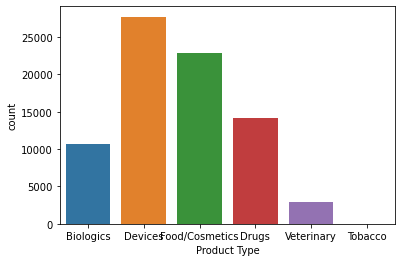

In [18]:
#data = df.groupby(df['Product Type']).count().plot(kind='bar')
sns.countplot(df['Product Type'])

<AxesSubplot:>

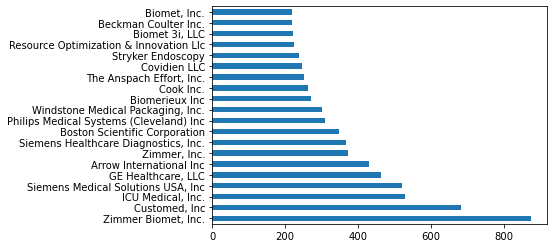

In [19]:
Devices = df[df['Product Type']=='Devices']
Devices['Recalling Firm Name'].value_counts()[:20].plot(kind='barh')

### How many recalls does each firm have?

In [21]:
data = df['Recalling Firm Name'].value_counts()
data

Zimmer Biomet, Inc.                   875
Customed, Inc                         682
OneBlood, Inc.                        673
Garden-Fresh Foods, Inc.              634
Aidapak Services, LLC                 538
                                     ... 
Vitility                                1
Lucky Mart Inc.                         1
Edap Technomed Inc.                     1
Bios S.r.l.                             1
Diversified Natural Products, Inc.      1
Name: Recalling Firm Name, Length: 8419, dtype: int64

In [22]:
df['Recalling Firm Name'].value_counts().to_frame().style.bar()

In [23]:
#df['Recalling Firm Name'].value_counts().sort_values().head(45).plot(kind = 'bar')

### What is the severity of the reason for recall (Class I, II, III)?

In [25]:
class1 = df[df['Event Classification']=='Class I']
class2 = df[df['Event Classification']=='Class II']
class3 = df[df['Event Classification']=='Class III']

<AxesSubplot:xlabel='Event Classification'>

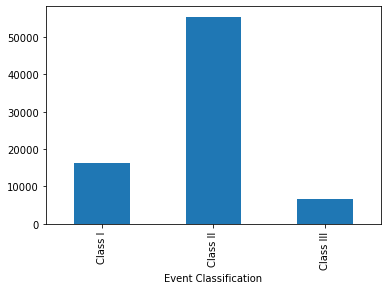

In [34]:
df.groupby('Event Classification').size().plot(kind='bar')

In [29]:
# Which product type causes more severe (Class I & II & III) health impacts (food/cosmetics, devices, veterinary products, tobacco, and biologics)?


<AxesSubplot:xlabel='Product Type', ylabel='count'>

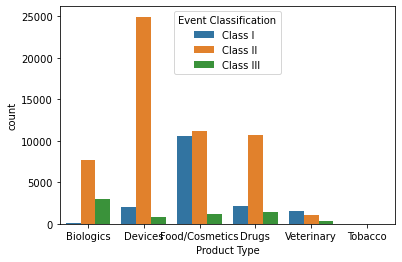

In [35]:
sns.countplot(data = df
            ,x = 'Product Type'
            ,hue = 'Event Classification'
            )

In [30]:
# Which country has the highest recalled products?

In [39]:
df['Recalling Firm Country'].value_counts()

United States                 75185
Canada                          828
Germany                         288
Switzerland                     237
United Kingdom                  217
Israel                          211
France                          167
Japan                           162
Italy                           147
China                           138
Sweden                          125
Netherlands                     119
Ireland                          96
Mexico                           80
India                            76
Belgium                          50
Denmark                          48
New Zealand                      31
Finland                          25
Spain                            23
Iceland                          23
Taiwan                           20
Korea (the Republic of)          19
Austria                          16
Norway                           15
Australia                        13
Hong Kong SAR                    11
Poland                      

In [36]:
#Indexing target variable

In [37]:
df['Event Classification'] = df['Event Classification'].astype('category')

In [38]:
lol = df['Event Classification'].astype('category')
df['Event_indexed']=lol.cat.codes
#df.drop(labels=['Event Classification'], axis=1, inplace=True)
df['Event_indexed'].value_counts()
#0 - Class I
#1 - Class II
#2 - Class III

1    55488
0    16280
2     6683
Name: Event_indexed, dtype: int64

In [42]:
df.head()

,FEI Number,Recalling Firm Name,Product Type,Product Classification,Status,Distribution Pattern,Recalling Firm City,Recalling Firm State,Recalling Firm Country,Center Classification Date,Reason for Recall,Product Description,Event ID,Event Classification,Product ID,Center,Recall Details,Event_indexed
0,1072425,"OneBlood, Inc.",Biologics,Class II,Completed,Florida,Orlando,Florida,United States,2022-06-12,"Apheresis Red Blood Cell product, for which qu...","Apheresis Red Blood Cells, Leukocytes Reduced",90354,Class II,194207,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...,1
1,1070196,"OneBlood, Inc.",Biologics,Class II,Terminated,Louisiana,St Petersburg,Florida,United States,2022-06-12,"Apheresis Red Blood Cell products, for which q...","Apheresis Red Blood Cells, Leukocytes Reduced",90329,Class II,194144,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...,1
2,1070196,"OneBlood, Inc.",Biologics,Class II,Terminated,North Carolina,St Petersburg,Florida,United States,2022-06-12,"Apheresis Red Blood Cell products, for which q...","Apheresis Red Blood Cells, Leukocytes Reduced",90357,Class II,194211,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...,1
3,1626009,Oklahoma Blood Institute,Biologics,Class II,Terminated,Ohio; Oklahoma,Oklahoma City,Oklahoma,United States,2022-06-12,"Blood products, for which donor eligibility wa...","Red Blood Cells, Leukocytes Reduced",90356,Class II,194209,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...,1
4,1626009,Oklahoma Blood Institute,Biologics,Class II,Terminated,Ohio; Oklahoma,Oklahoma City,Oklahoma,United States,2022-06-12,"Blood products, for which donor eligibility wa...",Cryoprecipitated AHF,90356,Class II,194210,CBER,https://www.accessdata.fda.gov/scripts/ires/?P...,1


In [41]:
df['Reason for Recall'].value_counts()

Lack of Assurance of Sterility                                                                                                                                                                                                                                                                                       1429
Product may contain undeclared milk.                                                                                                                                                                                                                                                                                  618
Microbial contamination                                                                                                                                                                                                                                                                                               468
Penicillin Cross Contamination: All lots of all products r